# Практична робота №6

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

**Завдання на практичну роботу "Deep Learning Regression":**

1. Створіть власний набір даних для регресії.
2. Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.
3. Спробуйте покращити результати, використовуючи такі підходи:
   * Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).
   * Збільшення кількості нейронів у кожному шарі.
   * Ознайомтеся з документацією [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?
   * Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?
4. Знайдіть відповідний код та побудуйте графік зміни функції втрат на тренувальному та тестувальному наборах даних під час тренування останньої моделі.

**Original model (steps 1 & 2)**

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                384       
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
125/125 [==============================] - 2s 7ms/step - loss: 89.3528 - mae: 89.3528 - val_loss: 79.8258 - val_mae: 79.8258
Epoch 2/200
125/125 [==============================] - 1s 4ms/step - loss: 57.9428 - mae: 57.9428 - val_loss: 22.3753 - val_mae: 22.3753
Epoch 3/200

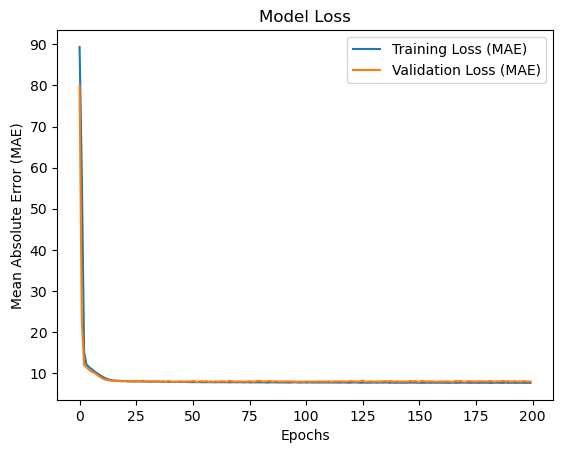

32/32 [==============================] - 0s 3ms/step


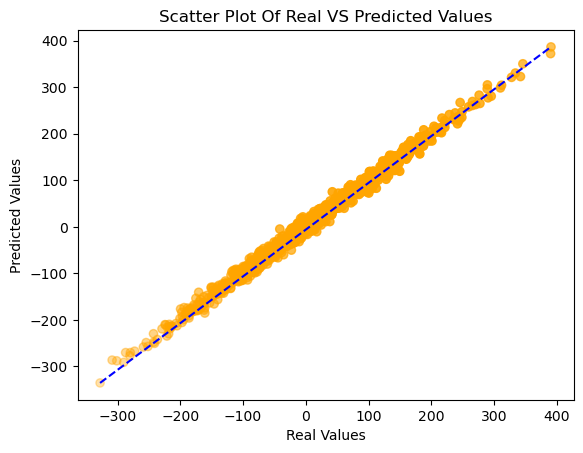

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Data generation
X, y = make_regression(n_samples=5000, n_features=5, n_informative=3, noise=10, random_state=42)
df = pd.DataFrame(data=X, columns=[f'Feature{i+1}' for i in range(5)])
df['Target'] = y
df.to_csv('data_regression.csv', index=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model creation
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Choosing loss function, optimizer and metrics for regression
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

# MAE loss function plot on train and validation data
plt.plot(figure=(12, 5))
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

# Scatter Plot Of Real VS Predicted Values
y_pred = model.predict(X_test)
distances = np.abs(y_test - y_pred) # Distance between real and predicted values
max_distance = np.max(distances) # For setting transparency
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Transparency which depends on the distance
    plt.scatter(y_test[i], y_pred[i], c='orange', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color = 'blue')
plt.title("Scatter Plot Of Real VS Predicted Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

**Improved model (step 3)**

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 128)               768       
                                                                 
 dense_74 (Dense)            (None, 64)                8256      
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11137 (43.50 KB)
Trainable params: 11137 (43.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
125/125 [==============================] - 2s 7ms/step - loss: 23.2901 - mae: 23.2901 - val_loss: 9.8390 - val_mae: 9.8390
Epoch 2/300
12

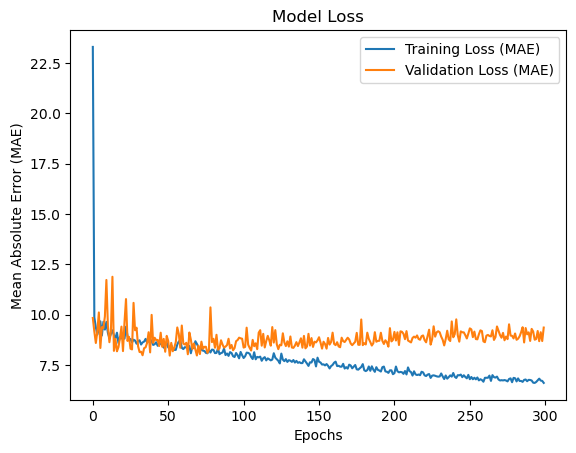

32/32 [==============================] - 0s 4ms/step


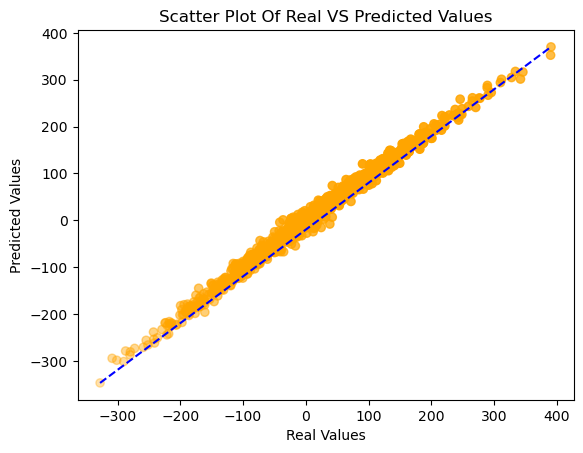

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Data generation
data = pd.read_csv('data_regression.csv')
X = data.drop('Target', axis=1)
y = data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model creation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Choosing loss function, optimizer and metrics for regression
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=32)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

# MAE loss function plot on train and validation data
plt.plot(figure=(12, 5))
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

# Scatter Plot Of Real VS Predicted Values
y_pred = model.predict(X_test)
distances = np.abs(y_test - y_pred) # Distance between real and predicted values
max_distance = np.max(distances) # For setting transparency
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Transparency which depends on the distance
    plt.scatter(y_test[i], y_pred[i], c='orange', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color = 'blue')
plt.title("Scatter Plot Of Real VS Predicted Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

Параметр *learning_rate* в оптимізаторі Adam визначає швидкість навчання, тобто крок або розмір кроку, на який оновлюються ваги нейронної мережі під час навчання. Величина learning rate впливає на те, наскільки великими або малими кроками ваги змінюються під час кожного оновлення. Чим більша величина кроку, тим швидше вчиться мережа, але також вище ризик перенавчання. Чим менша величина кроку, тим повільніше вчиться мережа, але також нижчий ризик перенавчання.

В оптимізаторі Adam, *learning_rate* є однією з основних параметрів налаштувань. Цей параметр зазвичай приймає значення з інтервалу (0, 1). Збільшення значення *learning_rate* може призвести до швидшого навчання, але при цьому може виникнути ризик "промаху" (overshooting), коли оновлення ваги занадто великі і можуть пропустити оптимальне значення.

Збільшення кількості епох тренування може призвести до різних результатів. Основні можливі сценарії включають:

1. **Модель може покращити свою точність**: Додаткові епохи можуть дозволити моделі краще адаптуватися до тренувальних даних, що може призвести до покращення її ефективності на тренувальному та тестовому наборах даних.

2. **Модель може перенавчитися**: Збільшення кількості епох може призвести до перенавчання, особливо якщо кількість даних обмежена. Модель може почати вивчати шум чи деталі, які не мають загального значення і не взагалі пов'язані з вхідними даними.

3. **Модель може досягти плато**: Після деякої точки додаткові епохи можуть не призвести до значного покращення. Може виникнути ситуація, коли модель вже знаходиться близько до оптимального стану, і додаткові епохи не призведуть до суттєвих змін у її ефективності.

Також важливо пам'ятати, що збільшення кількості епох вимагає більше часу для тренування моделі.

У нашому випадку збільшення значення *learning_rate* у 10 разів спричинило перенавчання моделі, що можна побачити на останньому графіку зміни функції втрат на тренувальному та тестувальному наборах даних. Якщо ж залишити значення *learning_rate* за замовчуванням (0.001), то результати першої та другої моделей будуть майже ідентичними.